<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/Coding_Algorithm/Coding_240711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2024년 7월 11일 목요일

프로세스

https://school.programmers.co.kr/learn/courses/30/lessons/42587

##문제 설명

운영체제의 역할 중 하나는 컴퓨터 시스템의 자원을 효율적으로 관리하는 것입니다. 이 문제에서는 운영체제가 다음 규칙에 따라 프로세스를 관리할 경우 특정 프로세스가 몇 번째로 실행되는지 알아내면 됩니다.

    1. 실행 대기 큐(Queue)에서 대기중인 프로세스 하나를 꺼냅니다.
    2. 큐에 대기중인 프로세스 중 우선순위가 더 높은 프로세스가 있다면 방금 꺼낸 프로세스를 다시 큐에 넣습니다.
    3. 만약 그런 프로세스가 없다면 방금 꺼낸 프로세스를 실행합니다.
        3.1 한 번 실행한 프로세스는 다시 큐에 넣지 않고 그대로 종료됩니다.

예를 들어 프로세스 4개 [A, B, C, D]가 순서대로 실행 대기 큐에 들어있고, 우선순위가 [2, 1, 3, 2]라면 [C, D, A, B] 순으로 실행하게 됩니다.
현재 실행 대기 큐(Queue)에 있는 프로세스의 중요도가 순서대로 담긴 배열 priorities와, 몇 번째로 실행되는지 알고싶은 프로세스의 위치를 알려주는 location이 매개변수로 주어질 때, 해당 프로세스가 몇 번째로 실행되는지 return 하도록 solution 함수를 작성해주세요.

## 제한 사항

- priorities의 길이는 1 이상 100 이하입니다.
- priorities의 원소는 1 이상 9 이하의 정수입니다.
- priorities의 원소는 우선순위를 나타내며 숫자가 클 수록 우선순위가 높습니다.
- location은 0 이상 (대기 큐에 있는 프로세스 수 - 1) 이하의 값을 가집니다.
- priorities의 가장 앞에 있으면 0, 두 번째에 있으면 1 … 과 같이 표현합니다.

## 입출력 예

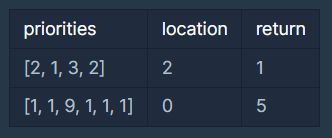

## 입출력 예 설명

예제 #1

문제에 나온 예와 같습니다.

----

예제 #2

6개의 프로세스 [A, B, C, D, E, F]가 대기 큐에 있고 중요도가 [1, 1, 9, 1, 1, 1] 이므로 [C, D, E, F, A, B] 순으로 실행됩니다. 따라서 A는 5번째로 실행됩니다.

## 문제 풀이

리스트를 딕셔너리 자료형으로 변환.

KEY는 리스트값, VALUE는 리스트의 순서.

In [1]:
priorities = [2, 1, 3, 2]
location = 2

In [15]:
priorities = [1, 1, 9, 1, 1, 1]
location = 0

In [2]:
pdic = {}

for i, j in enumerate(priorities):
    pdic[j] = i
pdic

{2: 3, 1: 1, 3: 2}

같은 key에 대해 딕셔너리가 업데이트되어 다음과 같은 결과 출력.

내가 생각했던 결과는 {2:0, 1:1, 3:2, 2:3}

그렇다면 일단 2차원 list 자료형에서 큐 자료형으로 변환

두 개의 큐를 준비해주어야 합니다.

첫 번째 큐는 리스트 값과 값의 인덱스 값. (=d)

두 번째 큐는 내림차순으로 정렬된 리스트 값입니다. (=spq)

In [3]:
from collections import deque

In [4]:
d = deque(priorities)
d

deque([2, 1, 3, 2])

In [5]:
d = deque()

for idx, i in enumerate(priorities):
    d.append([i, idx])
d

deque([[2, 0], [1, 1], [3, 2], [2, 3]])

In [6]:
sp = sorted(priorities, reverse=True)
sp

[3, 2, 2, 1]

In [7]:
spq = deque(sp)
spq

deque([3, 2, 2, 1])

In [8]:
print(d)
print(spq)

deque([[2, 0], [1, 1], [3, 2], [2, 3]])
deque([3, 2, 2, 1])


In [9]:
answer = 0

In [10]:
while d:
    value = d.popleft()

    if value[0] == spq[0]:
        spq.popleft()
        answer += 1
    else:
        d.append(value)

In [13]:
while d:
    value = d.popleft()

    if value[0] == spq[0]:
        spq.popleft()
        answer += 1
        if value[1] == location:                # 만약 location값이 value[1]과 같으면 그 answer이 정답
            print(answer)
    else:
        d.append(value)

In [14]:
# 최종답

from collections import deque

def solution(priorities, location):
    # 첫 번째 큐
    d = deque()

    for idx, i in enumerate(priorities):
        d.append([i, idx])

    # 두 번째 큐
    sp = sorted(priorities, reverse=True)
    spq = deque(sp)

    answer = 0

    while d:
        value = d.popleft()

        if value[0] == spq[0]:
            spq.popleft()
            answer += 1
            if value[1] == location:
                return answer
        else:
            d.append(value)

    return -1                                   # 에러처리

In [16]:
solution(priorities, location)

5